## 使用全连接神经网络进行房价回归

In [59]:
import keras

Using TensorFlow backend.


In [60]:
import tensorflow as tf

In [61]:
keras.__version__

'2.2.4'

In [62]:
tf.__version__

'1.11.0'

In [63]:
from keras.models import Sequential

In [64]:
from keras.layers import Dense,Dropout

In [66]:
from keras import metrics

In [67]:
from keras import backend as K

In [68]:
from keras.wrappers.scikit_learn import KerasRegressor

#### 练习一

请使用如下的简单神经网络进行机器学习通过动态调整来得到最好的结果

1.网络隐藏层数1~6层

2.每层的神经元个数10~100


In [108]:
def create_model():
    model=Sequential()
    model.add(Dense(10,input_dim=X_train.shape[1],activation='relu'))
    model.add(Dense(300,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam',loss='mean_squared_error')
    return model

In [114]:
model=create_model()

In [115]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 10)                3050      
_________________________________________________________________
dense_20 (Dense)             (None, 300)               3300      
_________________________________________________________________
dropout_3 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 50)                15050     
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 51        
Total params: 21,451
Trainable params: 21,451
Non-trainable params: 0
_________________________________________________________________


In [119]:
history=model.fit(X_train,y_train,epochs=2020,batch_size=32,verbose=0)

In [120]:
benchmark1(model,X_test,y_test)

RMSE: 27551.522255518415
LRMSE: 0.12987449404963047


0.12987449404963047

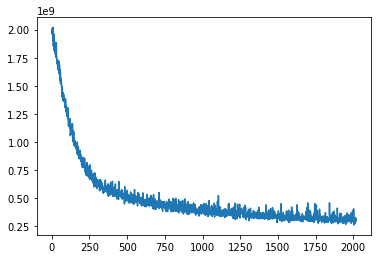

In [121]:
plt.plot(history.history['loss'])

In [123]:
model=create_model()
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3350,batch_size=32,verbose=0)

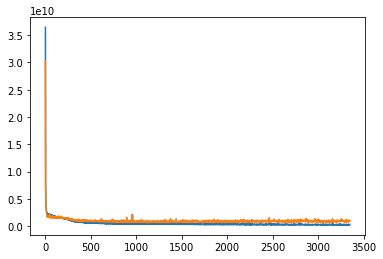

In [125]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [126]:
benchmark1(model,X_test,y_test)

RMSE: 29834.59446836246
LRMSE: 0.13039614991154375


0.13039614991154375

In [215]:
from keras.layers import BatchNormalization,Activation
from keras import optimizers

In [ ]:
##

#### 练习二

使用BatchNormalization层

使用SGD进行训练

In [253]:
def create_model2():
    model=Sequential()
    model.add(Dense(10,input_dim=X_train.shape[1]))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(300))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(1))
    sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd,loss='mean_squared_error')
    return model

In [230]:
model=create_model2()
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1000,batch_size=32,verbose=0)

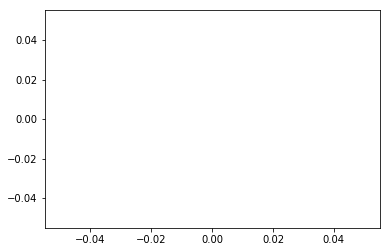

In [231]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [228]:
#benchmark1(model,X_test,y_test)

#### 练习三

数据使用log或者万为单位


In [248]:
#y_train

In [249]:
y_train_log=np.log(y_train)
y_train_wan=y_train/10000

In [250]:
y_test_log=np.log(y_test)
y_test_wan=y_test/10000

In [251]:
from sklearn.preprocessing import RobustScaler

In [258]:
def create_model3():
    model=Sequential()
    model.add(Dense(10,input_dim=X_train.shape[1]))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(300))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(1))
    #sgd = optimizers.SGD(optimizer='adam',loss='mean_squared_error')
    model.compile(optimizer='adam',loss='mean_squared_error')
    return model

In [259]:
model=create_model3()
history=model.fit(X_train,y_train_wan,validation_data=(X_test,y_test_wan),epochs=3000,batch_size=32,verbose=0)

In [277]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [267]:
benchmark1(model,X_test,y_test_wan)

#### 练习四

使用RobustScale进行训练

In [263]:
transformer=RobustScaler().fit(X_train)

In [268]:
X_train_norm=transformer.transform(X_train)
X_test_norm=transformer.transform(X_test)

In [269]:
def create_model4():
    model=Sequential()
    model.add(Dense(10,input_dim=X_train.shape[1]))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(300))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(1))
    #sgd = optimizers.SGD(optimizer='adam',loss='mean_squared_error')
    model.compile(optimizer='adam',loss='mean_squared_error')
    return model

In [ ]:
model=create_model4()

In [278]:
history=model.fit(X_train_norm,y_train,validation_data=(X_test_norm,y_test),epochs=500,batch_size=32,verbose=0)

In [1]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [2]:
benchmark1(model,X_test_norm,y_test)

#### 练习五

请根据上述的实验综合设计你的模型

In [224]:
keras.__version__

'2.2.4'

In [225]:
import tensorflow as tf

In [226]:
tf.__version__

'1.11.0'